In [ ]:
import ast 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_DA_Poland = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Poland')].copy()
df_DA_Poland

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
2769,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-05-03 13:48:45,True,False,Poland,None,NaN,NaN,Andersen,"[python, aws, excel]","{'analyst_tools': ['excel'], 'cloud': ['aws'],..."
6370,Data Analyst,Data Analyst,"Warsaw, Poland",via Trabajo.org,Full-time,False,Poland,2023-02-01 13:57:20,True,False,Poland,None,NaN,NaN,Santander,"[sql, sas, sas]","{'analyst_tools': ['sas'], 'programming': ['sq..."
6637,Data Analyst,Data Analyst,"Białystok, Poland",via Trabajo.org,Full-time,False,Poland,2023-02-05 13:21:07,True,False,Poland,None,NaN,NaN,FE fundinfo,"[python, vba, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
7147,Data Analyst,Data Analyst,Poland,via Trabajo.org,Full-time,False,Poland,2023-02-18 13:22:36,True,False,Poland,None,NaN,NaN,LPP SA,"[sql, go, looker]","{'analyst_tools': ['looker'], 'programming': [..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779092,Data Analyst,Data Analyst,"Warsaw, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-01 05:31:46,False,False,Poland,None,NaN,NaN,BEC Poland,[excel],{'analyst_tools': ['excel']}
779370,Data Analyst,Data Analyst,"Wrocław, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-01 05:31:53,True,False,Poland,None,NaN,NaN,Devire Sp. z o.o.,"[python, sql, numpy, pandas, windows]","{'libraries': ['numpy', 'pandas'], 'os': ['win..."
780570,Data Analyst,Data Analyst,"Lublin, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-01 05:31:46,True,False,Poland,None,NaN,NaN,Lingaro,"[sql, windows, power bi, tableau, looker, qlik]","{'analyst_tools': ['power bi', 'tableau', 'loo..."
780708,Data Analyst,Data Analyst,"Poznań, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-01 05:31:55,True,False,Poland,None,NaN,NaN,Netguru S.A.,"[sql, looker, tableau]","{'analyst_tools': ['looker', 'tableau'], 'prog..."


In [7]:
df_DA_Poland['job_posted_month_no'] = df_DA_Poland['job_posted_date'].dt.month

# Explode job_skills column
df_DA_Poland_explode = df_DA_Poland.explode('job_skills')

In [8]:
df_DA_Poland_pivot = df_DA_Poland_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_Poland_pivot

job_skills,airflow,alteryx,angular,atlassian,aws,azure,bash,bigquery,c,c#,...,tableau,terminal,typescript,unix,vba,visio,webex,windows,word,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,6,4,0,0,7,8,0,6,2,0,...,32,0,0,1,5,0,0,3,0,2
2,4,0,0,0,4,10,0,4,1,3,...,18,0,0,0,7,2,0,3,4,2
3,1,3,0,0,7,9,0,5,3,1,...,30,0,0,0,8,2,2,4,7,1
4,6,1,0,0,16,12,0,2,1,0,...,26,0,0,0,2,0,0,4,0,0
5,0,0,0,0,10,10,0,2,0,0,...,12,0,1,0,0,0,0,2,1,0
6,0,0,0,0,2,1,1,3,0,0,...,6,0,1,0,1,0,0,0,3,0
7,0,0,0,0,2,3,0,1,0,0,...,10,0,0,0,3,1,1,0,2,0
8,0,0,0,0,0,6,0,2,0,0,...,6,0,0,0,0,0,0,0,0,0
9,0,1,0,1,1,3,0,3,0,1,...,8,1,0,0,2,0,0,0,0,0


In [9]:
df_DA_Poland_pivot.loc['Total'] = df_DA_Poland_pivot.sum()
df_DA_Poland_pivot = df_DA_Poland_pivot[df_DA_Poland_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_Poland_pivot = df_DA_Poland_pivot.drop('Total')

df_DA_Poland_pivot

job_skills,sql,python,excel,tableau,power bi,azure,r,aws,gcp,sas,...,atlassian,angular,ggplot2,flask,gitlab,jquery,react,powerbi,plotly,unix
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,58,32,33,32,12,8,11,7,5,4,...,0,0,0,0,0,0,0,0,0,1
2,54,37,32,18,15,10,16,4,3,8,...,0,0,0,0,0,0,0,0,0,0
3,40,32,37,30,21,9,18,7,4,6,...,0,0,0,0,0,0,0,0,1,0
4,40,24,18,26,16,12,4,16,12,0,...,0,0,1,0,0,0,0,0,0,0
5,29,24,19,12,9,10,5,10,7,2,...,0,0,0,0,0,0,0,0,0,0
6,17,12,14,6,4,1,3,2,0,4,...,0,0,0,0,0,0,0,0,0,0
7,31,23,14,10,13,3,5,2,2,6,...,0,0,0,0,1,0,0,0,0,0
8,25,14,21,6,10,6,4,0,2,2,...,0,0,0,0,0,0,0,1,0,0
9,20,18,10,8,4,3,1,1,0,2,...,1,0,0,0,0,0,0,0,0,0


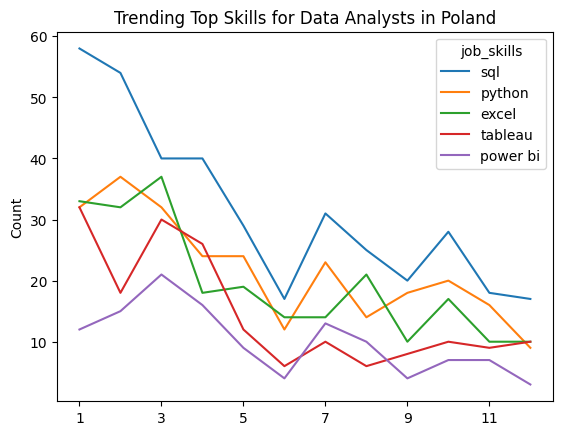

In [10]:
df_DA_Poland_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in Poland')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [11]:
DA_totals = df_DA_Poland.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     72
2     73
3     69
4     60
5     46
6     25
7     37
8     34
9     24
10    34
11    31
12    32
dtype: int64

In [12]:
df_DA_Poland_percent = df_DA_Poland_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_Poland_percent = df_DA_Poland_percent.reset_index()
df_DA_Poland_percent['job_posted_month'] = df_DA_Poland_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_Poland_percent = df_DA_Poland_percent.set_index('job_posted_month')
df_DA_Poland_percent = df_DA_Poland_percent.drop(columns='job_posted_month_no')

df_DA_Poland_percent

job_skills,sql,python,excel,tableau,power bi,azure,r,aws,gcp,sas,...,atlassian,angular,ggplot2,flask,gitlab,jquery,react,powerbi,plotly,unix
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,80.555556,44.444444,45.833333,44.444444,16.666667,11.111111,15.277778,9.722222,6.944444,5.555556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.388889
Feb,73.972603,50.684932,43.835616,24.657534,20.547945,13.698630,21.917808,5.479452,4.109589,10.958904,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,57.971014,46.376812,53.623188,43.478261,30.434783,13.043478,26.086957,10.144928,5.797101,8.695652,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.449275,0.000000
Apr,66.666667,40.000000,30.000000,43.333333,26.666667,20.000000,6.666667,26.666667,20.000000,0.000000,...,0.000000,0.000000,1.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,63.043478,52.173913,41.304348,26.086957,19.565217,21.739130,10.869565,21.739130,15.217391,4.347826,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,68.000000,48.000000,56.000000,24.000000,16.000000,4.000000,12.000000,8.000000,0.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,83.783784,62.162162,37.837838,27.027027,35.135135,8.108108,13.513514,5.405405,5.405405,16.216216,...,0.000000,0.000000,0.000000,0.000000,2.702703,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,73.529412,41.176471,61.764706,17.647059,29.411765,17.647059,11.764706,0.000000,5.882353,5.882353,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.941176,0.000000,0.000000
Sep,83.333333,75.000000,41.666667,33.333333,16.666667,12.500000,4.166667,4.166667,0.000000,8.333333,...,4.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


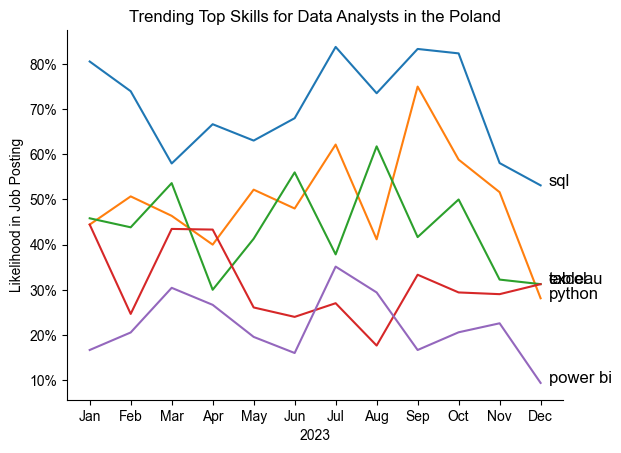

In [13]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_Poland_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() 

plt.title('Trending Top Skills for Data Analysts in the Poland')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))


for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()